# Load & Inspect Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Dataset.csv")

# Display first few rows
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Feature Engineering – Create New Columns

In [11]:
# Length of restaurant name
df['Name_Length'] = df['Restaurant Name'].astype(str).apply(len)

# Length of address
df['Address_Length'] = df['Address'].astype(str).apply(len)

# Binary encoding for Table booking and Online delivery
df['Has_Table_Booking'] = df['Has Table booking'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df['Has_Online_Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

# Number of cuisines offered
df['Cuisine_Count'] = df['Cuisines'].astype(str).apply(lambda x: len(x.split(',')) if x != 'nan' else 0)

# Count of restaurants per city
city_counts = df['City'].value_counts().to_dict()
df['City_Restaurant_Count'] = df['City'].map(city_counts)

# Count of restaurants per country
country_counts = df['Country Code'].value_counts().to_dict()
df['Country_Restaurant_Count'] = df['Country Code'].map(country_counts)


# Summary of Engineered Features

In [12]:
# Display summary
df[['Name_Length', 'Address_Length', 'Has_Table_Booking', 
    'Has_Online_Delivery', 'Cuisine_Count', 
    'City_Restaurant_Count', 'Country_Restaurant_Count']].describe()


,Name_Length,Address_Length,Has_Table_Booking,Has_Online_Delivery,Cuisine_Count,City_Restaurant_Count,Country_Restaurant_Count
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000
mean,15.164171,53.536698,0.121244,0.256622,2.063658,3399.023034,7859.71448
std,6.858392,17.122035,0.326428,0.436792,1.094072,2427.249301,2458.71970
min,2.000000,13.000000,0.000000,0.000000,0.000000,1.000000,4.00000
25%,10.000000,41.000000,0.000000,0.000000,1.000000,1080.000000,8652.00000
50%,14.000000,52.000000,0.000000,0.000000,2.000000,5473.000000,8652.00000
75%,19.000000,64.000000,0.000000,1.000000,3.000000,5473.000000,8652.00000
max,54.000000,132.000000,1.000000,1.000000,8.000000,5473.000000,8652.00000


# Popularity Based on Location

In [7]:
# City-level restaurant count
city_counts = df['City'].value_counts().to_dict()
df['City_Restaurant_Count'] = df['City'].map(city_counts)

# Country-level restaurant count
country_counts = df['Country Code'].value_counts().to_dict()
df['Country_Restaurant_Count'] = df['Country Code'].map(country_counts)


# Visualize Feature Distributions

C:\Users\aditya tiwari\AppData\Local\Temp\ipykernel_27824\3801631290.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Has_Table_Booking', palette='Set2')
C:\Users\aditya tiwari\AppData\Local\Temp\ipykernel_27824\3801631290.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Has_Online_Delivery', palette='Set3')
C:\Users\aditya tiwari\AppData\Local\Temp\ipykernel_27824\3801631290.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')


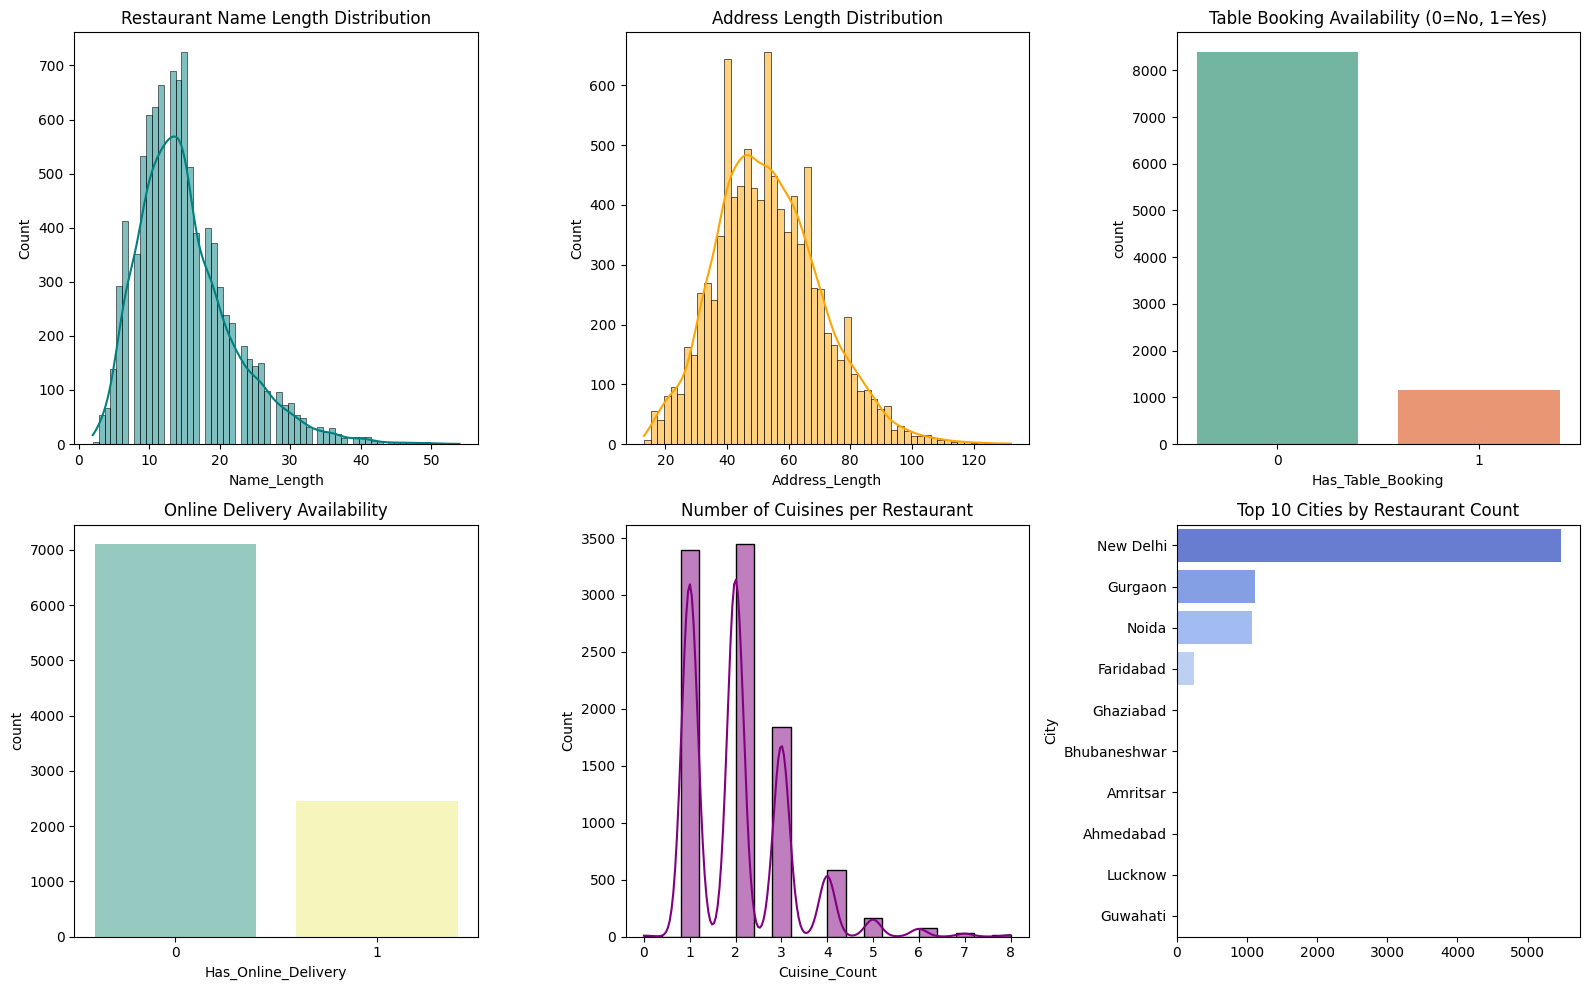

In [13]:
plt.figure(figsize=(16, 10))

# Name length
plt.subplot(2, 3, 1)
sns.histplot(df['Name_Length'], kde=True, color='teal')
plt.title("Restaurant Name Length Distribution")

# Address length
plt.subplot(2, 3, 2)
sns.histplot(df['Address_Length'], kde=True, color='orange')
plt.title("Address Length Distribution")

# Table booking
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Has_Table_Booking', palette='Set2')
plt.title("Table Booking Availability (0=No, 1=Yes)")

# Online delivery
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Has_Online_Delivery', palette='Set3')
plt.title("Online Delivery Availability")

# Cuisine count
plt.subplot(2, 3, 5)
sns.histplot(df['Cuisine_Count'], kde=True, bins=20, color='purple')
plt.title("Number of Cuisines per Restaurant")

# Restaurants per city
plt.subplot(2, 3, 6)
top_cities = df['City'].value_counts().nlargest(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')
plt.title("Top 10 Cities by Restaurant Count")

plt.tight_layout()
plt.show()


# Check Feature Summary

In [9]:
# Display some of the new features
df[['Restaurant Name', 'Restaurant_Name_Length', 'Restaurant_Name_WordCount',
    'Has_Table_Booking', 'Has_Online_Delivery',
    'City_Restaurant_Count', 'Country_Restaurant_Count',
    'Num_Cuisines', 'Votes_per_Cuisine']].head()



,Restaurant Name,Restaurant_Name_Length,Restaurant_Name_WordCount,Has_Table_Booking,Has_Online_Delivery,City_Restaurant_Count,Country_Restaurant_Count,Num_Cuisines,Votes_per_Cuisine
0,Le Petit Souffle,16,3,1,0,2,22,3,104.666667
1,Izakaya Kikufuji,16,2,1,0,2,22,1,591.000000
2,Heat - Edsa Shangri-La,22,4,1,0,4,22,4,67.500000
3,Ooma,4,1,0,0,4,22,2,182.500000
4,Sambo Kojin,11,2,1,0,4,22,2,114.500000


# Correlation Heatmap of Engineered Features

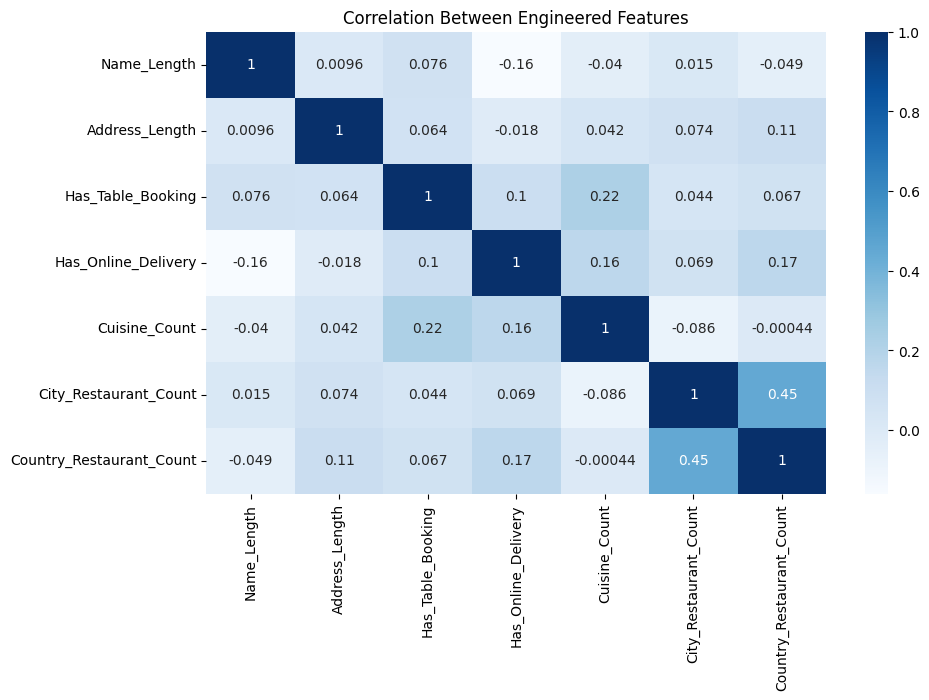

In [14]:
plt.figure(figsize=(10, 6))
engineered_cols = ['Name_Length', 'Address_Length', 'Has_Table_Booking', 
                   'Has_Online_Delivery', 'Cuisine_Count', 
                   'City_Restaurant_Count', 'Country_Restaurant_Count']
sns.heatmap(df[engineered_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Engineered Features")
plt.show()
